# **Task # 6: Prediction using Decision Tree Algorithm**
# **By: Laiba Abid**

In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

**Loading the Dataset into a Pandas Dataframe**

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **Splitting the dataset into training and testing sets**

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(y.shape, X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

(150,) (150, 4)


**Create the Decision Tree classifier and fit it to the training data**

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


**Predict the classes for the testing data**

In [8]:
y_pred = dtree.predict(X_test)

**Evaluate the performance of the classifier by calculating the accuracy and confusion matrix**

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**Visualize the Decision Tree classifier graphically**

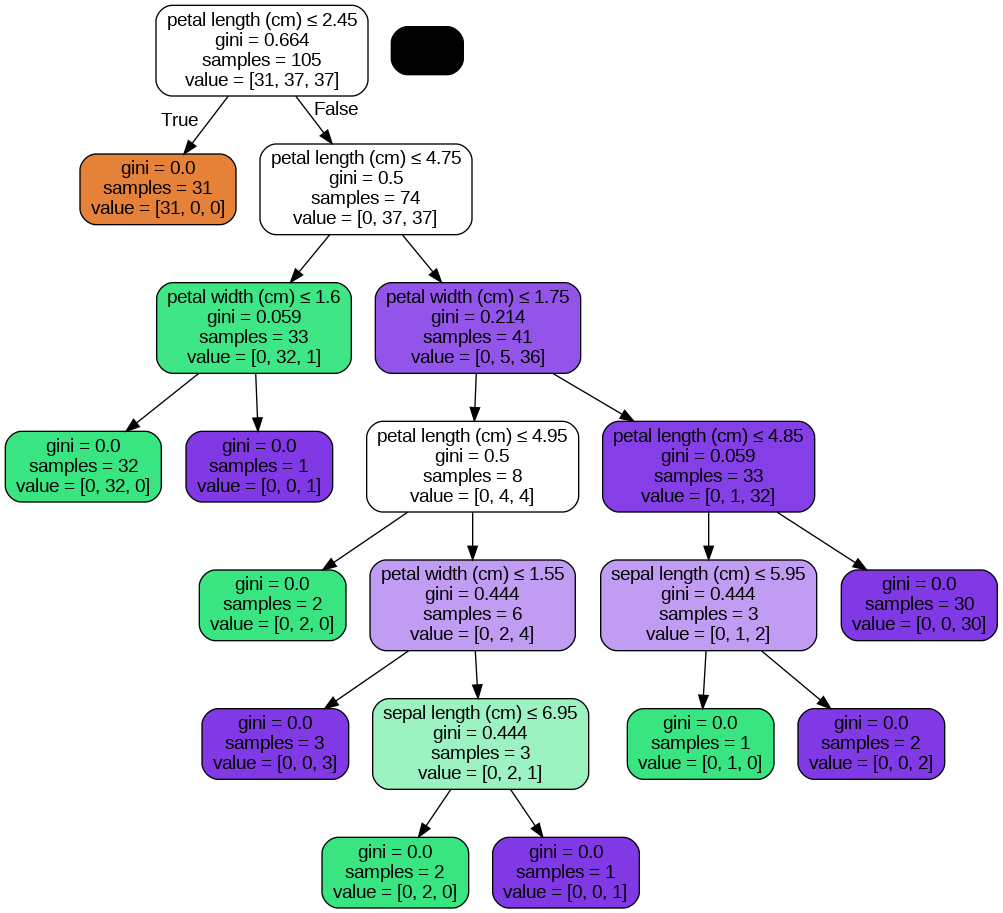

In [10]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())